# **EDA**

**Load the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("weather_data.csv")

df.drop(columns=["Date"], inplace=True)

**Dataset overview**

In [2]:
print("Dataset Information:")
print(df.info())  # Show data types, missing values, etc.
print("\nFirst 5 rows of data:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3271 non-null   float64
 1   MaxTemp        3271 non-null   float64
 2   Rainfall       3271 non-null   float64
 3   Evaporation    3271 non-null   float64
 4   Sunshine       3271 non-null   float64
 5   WindGustDir    3271 non-null   object 
 6   WindGustSpeed  3271 non-null   int64  
 7   WindDir9am     3271 non-null   object 
 8   WindDir3pm     3271 non-null   object 
 9   WindSpeed9am   3271 non-null   int64  
 10  WindSpeed3pm   3271 non-null   int64  
 11  Humidity9am    3271 non-null   int64  
 12  Humidity3pm    3271 non-null   int64  
 13  Pressure9am    3271 non-null   float64
 14  Pressure3pm    3271 non-null   float64
 15  Cloud9am       3271 non-null   int64  
 16  Cloud3pm       3271 non-null   int64  
 17  Temp9am        3271 non-null   

**Descriptive statistics**

In [3]:
print("\nNumerical Feature Statistics:")
print(df.describe())


Numerical Feature Statistics:
           MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3271.000000  3271.000000  3271.000000  3271.000000  3271.000000   
mean     14.877102    23.005564     3.342158     5.175787     7.168970   
std       4.554710     4.483752     9.917746     2.757684     3.815966   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.250000   
50%      14.900000    22.800000     0.000000     4.800000     8.300000   
75%      18.800000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    3271.000000   3271.000000   3271.000000  3271.000000  3271.000000   
mean       41.476307     15.077041     19.294405    68.243962    54.698563   
std        10.806951      7.043825      7.453331    15.086127    16.

**Missing value analysis**

In [4]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({"Missing Count": missing_values, "Missing Percentage (%)": missing_percentage})
print("\nMissing Values Summary:")
print(missing_df[missing_df["Missing Count"] > 0].sort_values(by="Missing Percentage (%)", ascending=False))


Missing Values Summary:
Empty DataFrame
Columns: [Missing Count, Missing Percentage (%)]
Index: []


**Distribution of target variable 'Rainfall'**

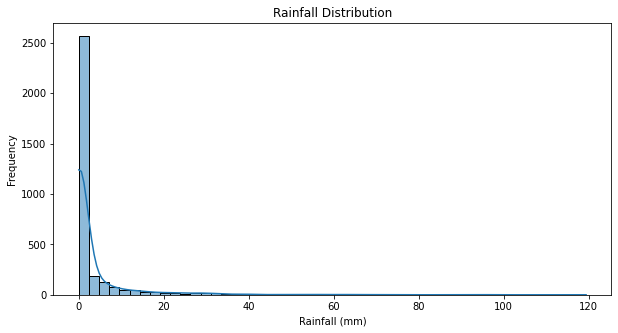

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Rainfall"].dropna(), bins=50, kde=True)
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

**Wind direction feature distributions**

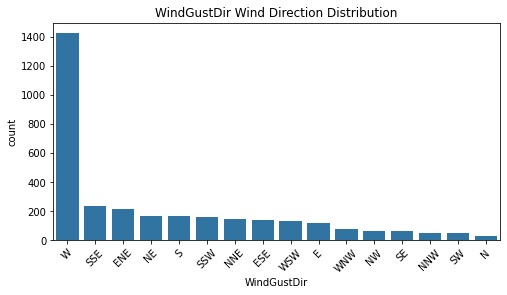

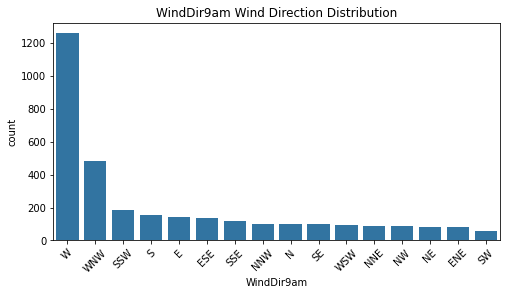

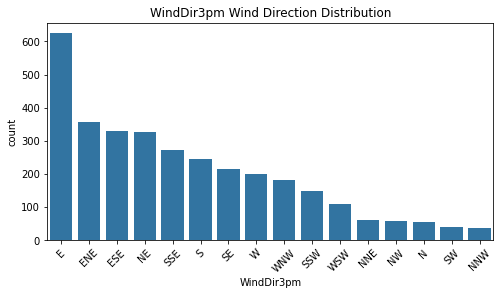

In [6]:
wind_features = ["WindGustDir", "WindDir9am", "WindDir3pm"]
for col in wind_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"{col} Wind Direction Distribution")
    plt.show()

**Correlation analysis**

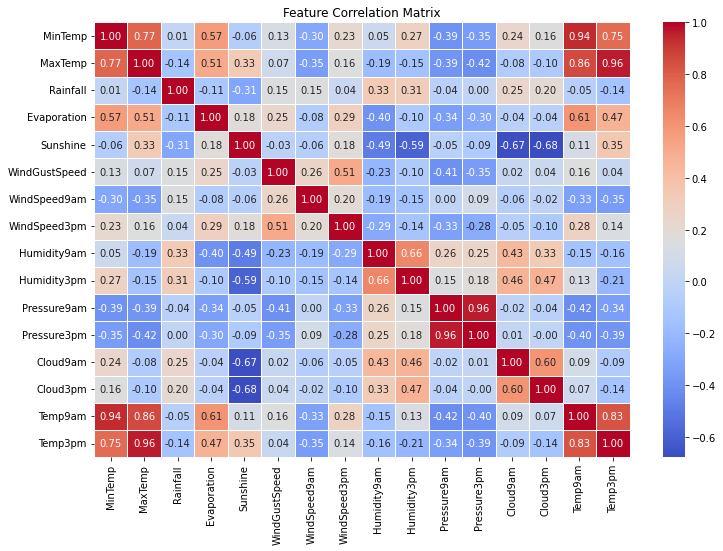

In [7]:
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

**Feature vs. Rainfall visualization**

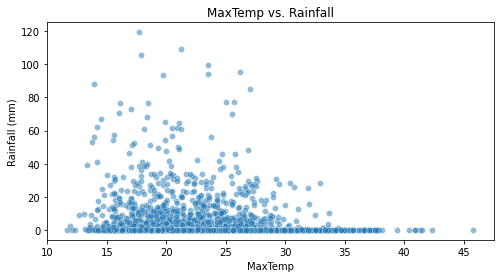

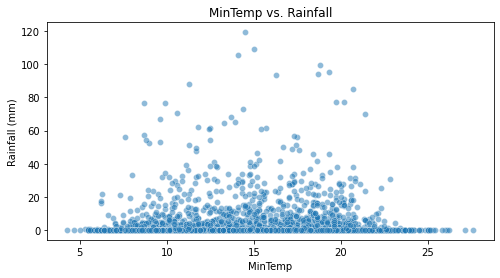

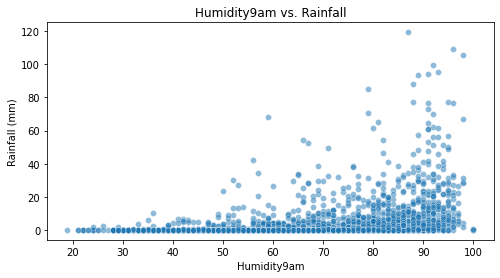

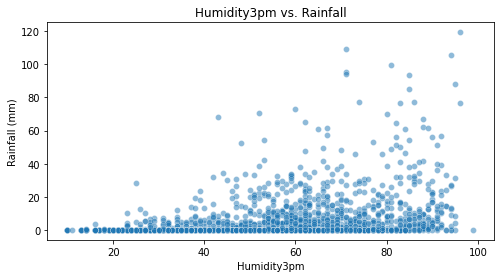

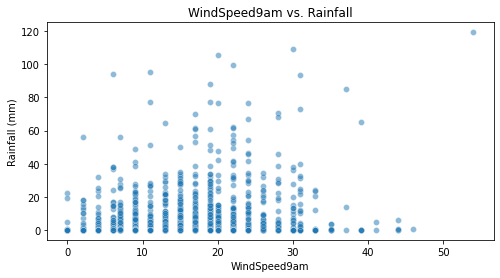

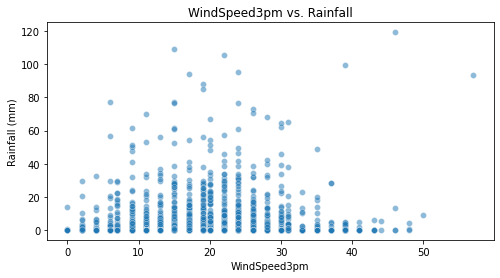

In [8]:
num_features = ["MaxTemp", "MinTemp", "Humidity9am", "Humidity3pm", "WindSpeed9am", "WindSpeed3pm"]

for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[col], y=df["Rainfall"], alpha=0.5)
    plt.title(f"{col} vs. Rainfall")
    plt.xlabel(col)
    plt.ylabel("Rainfall (mm)")
    plt.show()
